# 🤖 Análisis de Métricas de Entrenamiento Q-Learning

Este notebook analiza las métricas generadas durante el entrenamiento del agente Q-Learning para Connect 4.

## 📊 Contenido del Análisis:
1. **Progreso de Entrenamiento**: Evolución de victorias, derrotas y empates
2. **Tasa de Victoria**: Porcentaje de partidas ganadas a lo largo del tiempo
3. **Recompensas**: Evolución de las recompensas obtenidas
4. **Distribución de Duración**: Análisis de la longitud de las partidas
5. **Estadísticas Finales**: Resumen completo del rendimiento

---

In [ ]:
import json

import numpy as np


metrics_file = "training_metrics.json"

# Cargar y procesar los datos de métricas
try:
    with open(metrics_file, "r") as f:
        data = json.load(f)
    
    print(f"✅ Datos cargados exitosamente: {len(data)} puntos de métricas")
    
    # Extraer datos
    episodes = [d["episode"] for d in data]
    rewards = [d["reward"] for d in data]
    steps = [d["steps"] for d in data] 
    wins = [d["wins"] for d in data]
    losses = [d["losses"] for d in data]
    draws = [d["draws"] for d in data]
    
    # Calcular métricas adicionales
    total_games = np.array(wins) + np.array(losses) + np.array(draws)
    win_rates = np.array(wins) / total_games * 100
    
    # Verificar la consistencia de los datos
    print(f"🔍 Verificación de datos:")
    print(f"   - Rango de episodios: {min(episodes)} - {max(episodes)}")
    print(f"   - Total de puntos de datos: {len(episodes)}")
    print(f"   - Victorias finales: {wins[-1]}")
    print(f"   - Tasa de victoria final: {win_rates[-1]:.2f}%")
    
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("💡 Asegúrate de haber ejecutado el entrenamiento primero")
except json.JSONDecodeError as e:
    print(f"❌ Error al leer el archivo JSON: {e}")
    print("💡 El archivo de métricas puede estar corrupto")
except Exception as e:
    print(f"❌ Error inesperado: {e}")
    raise

✅ Datos cargados exitosamente: 120 puntos de métricas
🔍 Verificación de datos:
   - Rango de episodios: 100 - 2000
   - Total de puntos de datos: 120
   - Victorias finales: 1506
   - Tasa de victoria final: 75.30%


📊 Generando visualizaciones...


C:\Users\juanp\AppData\Local\Temp\ipykernel_22840\2879070183.py:59: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\juanp\AppData\Local\Temp\ipykernel_22840\2879070183.py:59: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\juanp\AppData\Local\Temp\ipykernel_22840\2879070183.py:59: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\juanp\AppData\Local\Temp\ipykernel_22840\2879070183.py:59: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\juanp\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\juanp\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 

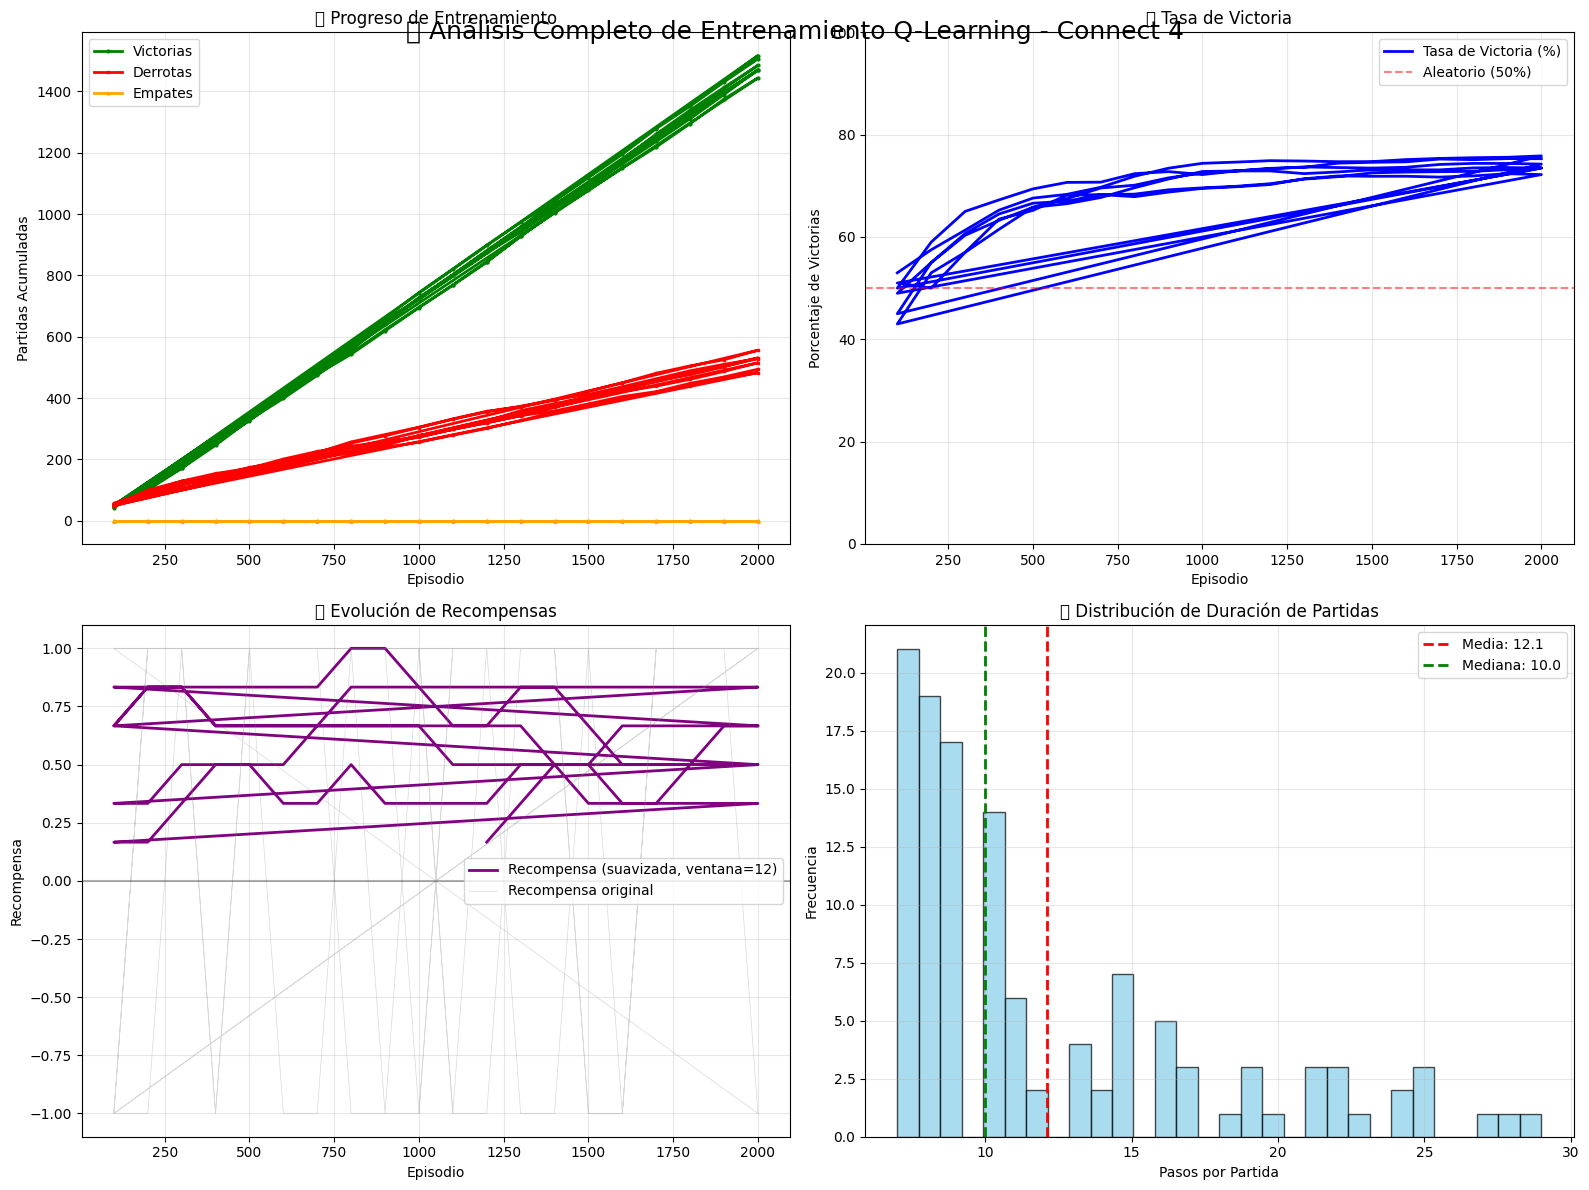

In [16]:
# Crear las visualizaciones principales
from matplotlib import pyplot as plt


print("📊 Generando visualizaciones...")

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Progreso de victorias/derrotas/empates
axes[0, 0].plot(episodes, wins, label="Victorias", color='green', linewidth=2, marker='o', markersize=2)
axes[0, 0].plot(episodes, losses, label="Derrotas", color='red', linewidth=2, marker='s', markersize=2)
axes[0, 0].plot(episodes, draws, label="Empates", color='orange', linewidth=2, marker='^', markersize=2)
axes[0, 0].set_xlabel("Episodio")
axes[0, 0].set_ylabel("Partidas Acumuladas")
axes[0, 0].set_title("📈 Progreso de Entrenamiento")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Tasa de victoria
axes[0, 1].plot(episodes, win_rates, label="Tasa de Victoria (%)", color='blue', linewidth=2)
axes[0, 1].set_xlabel("Episodio")
axes[0, 1].set_ylabel("Porcentaje de Victorias")
axes[0, 1].set_title("🎯 Tasa de Victoria")
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim([0, 100])
# Añadir línea horizontal en 50% para referencia
axes[0, 1].axhline(y=50, color='red', linestyle='--', alpha=0.5, label='Aleatorio (50%)')
axes[0, 1].legend()

# 3. Recompensas promedio con suavizado
window = min(20, len(rewards)//10)
if window > 1:
    rewards_smooth = np.convolve(rewards, np.ones(window)/window, mode='valid')
    episodes_smooth = episodes[window-1:]
    axes[1, 0].plot(episodes_smooth, rewards_smooth, label=f"Recompensa (suavizada, ventana={window})", color='purple', linewidth=2)
    axes[1, 0].plot(episodes, rewards, alpha=0.3, color='gray', linewidth=0.5, label='Recompensa original')
else:
    axes[1, 0].plot(episodes, rewards, label="Recompensa", color='purple', linewidth=2)

axes[1, 0].set_xlabel("Episodio")
axes[1, 0].set_ylabel("Recompensa")
axes[1, 0].set_title("💰 Evolución de Recompensas")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
# Línea horizontal en 0 para referencia
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 4. Distribución de duración de partidas
axes[1, 1].hist(steps, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 1].axvline(np.mean(steps), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(steps):.1f}')
axes[1, 1].axvline(np.median(steps), color='green', linestyle='--', linewidth=2, label=f'Mediana: {np.median(steps):.1f}')
axes[1, 1].set_xlabel("Pasos por Partida")
axes[1, 1].set_ylabel("Frecuencia")
axes[1, 1].set_title("⏱️ Distribución de Duración de Partidas")
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.suptitle("🤖 Análisis Completo de Entrenamiento Q-Learning - Connect 4", fontsize=18, y=0.98)
plt.show()

In [17]:
# Estadísticas detalladas y análisis avanzado
print("=" * 60)
print("📊 ANÁLISIS ESTADÍSTICO COMPLETO")
print("=" * 60)

# Estadísticas básicas
print("🎯 RENDIMIENTO FINAL:")
print(f"   🏆 Victorias: {wins[-1]:,} ({win_rates[-1]:.2f}%)")
print(f"   💀 Derrotas: {losses[-1]:,} ({losses[-1]/total_games[-1]*100:.2f}%)")
print(f"   🤝 Empates: {draws[-1]:,} ({draws[-1]/total_games[-1]*100:.2f}%)")
print(f"   🎲 Total de partidas: {total_games[-1]:,}")

print("\n⏱️ DURACIÓN DE PARTIDAS:")
print(f"   📊 Promedio: {np.mean(steps):.1f} pasos")
print(f"   📈 Mediana: {np.median(steps):.1f} pasos")
print(f"   📉 Mínima: {min(steps)} pasos")
print(f"   📈 Máxima: {max(steps)} pasos")
print(f"   📏 Desviación estándar: {np.std(steps):.1f} pasos")

# Análisis de convergencia
print("\n🔄 ANÁLISIS DE CONVERGENCIA:")
# Calcular la mejora en la tasa de victoria
if len(win_rates) >= 10:
    initial_wr = np.mean(win_rates[:10])  # Primeros 10 puntos
    final_wr = np.mean(win_rates[-10:])   # Últimos 10 puntos
    improvement = final_wr - initial_wr
    print(f"   📈 Tasa de victoria inicial: {initial_wr:.2f}%")
    print(f"   🎯 Tasa de victoria final: {final_wr:.2f}%")
    print(f"   🚀 Mejora total: {improvement:+.2f}%")

# Encontrar el punto de convergencia (donde la mejora se estabiliza)
if len(win_rates) >= 20:
    # Calcular la varianza móvil para encontrar estabilización
    window_size = max(10, len(win_rates) // 20)
    variances = []
    for i in range(window_size, len(win_rates)):
        window_data = win_rates[i-window_size:i]
        variances.append(np.var(window_data))
    
    # Encontrar donde la varianza es mínima (más estable)
    if variances:
        min_var_idx = np.argmin(variances) + window_size
        convergence_episode = episodes[min_var_idx]
        print(f"   🎯 Convergencia aproximada en episodio: {convergence_episode}")

print("\n💰 ANÁLISIS DE RECOMPENSAS:")
print(f"   📊 Recompensa promedio: {np.mean(rewards):.3f}")
print(f"   📈 Recompensa máxima: {max(rewards):.3f}")
print(f"   📉 Recompensa mínima: {min(rewards):.3f}")

# Porcentaje de partidas con recompensa positiva, negativa y neutra
positive_rewards = sum(1 for r in rewards if r > 0)
negative_rewards = sum(1 for r in rewards if r < 0)
neutral_rewards = sum(1 for r in rewards if r == 0)

print(f"   ✅ Recompensas positivas: {positive_rewards} ({positive_rewards/len(rewards)*100:.1f}%)")
print(f"   ❌ Recompensas negativas: {negative_rewards} ({negative_rewards/len(rewards)*100:.1f}%)")
print(f"   ⚪ Recompensas neutras: {neutral_rewards} ({neutral_rewards/len(rewards)*100:.1f}%)")

print("\n" + "=" * 60)

📊 ANÁLISIS ESTADÍSTICO COMPLETO
🎯 RENDIMIENTO FINAL:
   🏆 Victorias: 1,506 (75.30%)
   💀 Derrotas: 494 (24.70%)
   🤝 Empates: 0 (0.00%)
   🎲 Total de partidas: 2,000

⏱️ DURACIÓN DE PARTIDAS:
   📊 Promedio: 12.1 pasos
   📈 Mediana: 10.0 pasos
   📉 Mínima: 7 pasos
   📈 Máxima: 29 pasos
   📏 Desviación estándar: 5.6 pasos

🔄 ANÁLISIS DE CONVERGENCIA:
   📈 Tasa de victoria inicial: 66.25%
   🎯 Tasa de victoria final: 74.46%
   🚀 Mejora total: +8.22%
   🎯 Convergencia aproximada en episodio: 2000

💰 ANÁLISIS DE RECOMPENSAS:
   📊 Recompensa promedio: 0.583
   📈 Recompensa máxima: 1.000
   📉 Recompensa mínima: -1.000
   ✅ Recompensas positivas: 95 (79.2%)
   ❌ Recompensas negativas: 25 (20.8%)
   ⚪ Recompensas neutras: 0 (0.0%)



📈 Generando análisis adicionales...


C:\Users\juanp\AppData\Local\Temp\ipykernel_22840\1088564489.py:48: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\juanp\AppData\Local\Temp\ipykernel_22840\1088564489.py:48: UserWarning: Glyph 127873 (\N{WRAPPED PRESENT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\juanp\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\juanp\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127873 (\N{WRAPPED PRESENT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


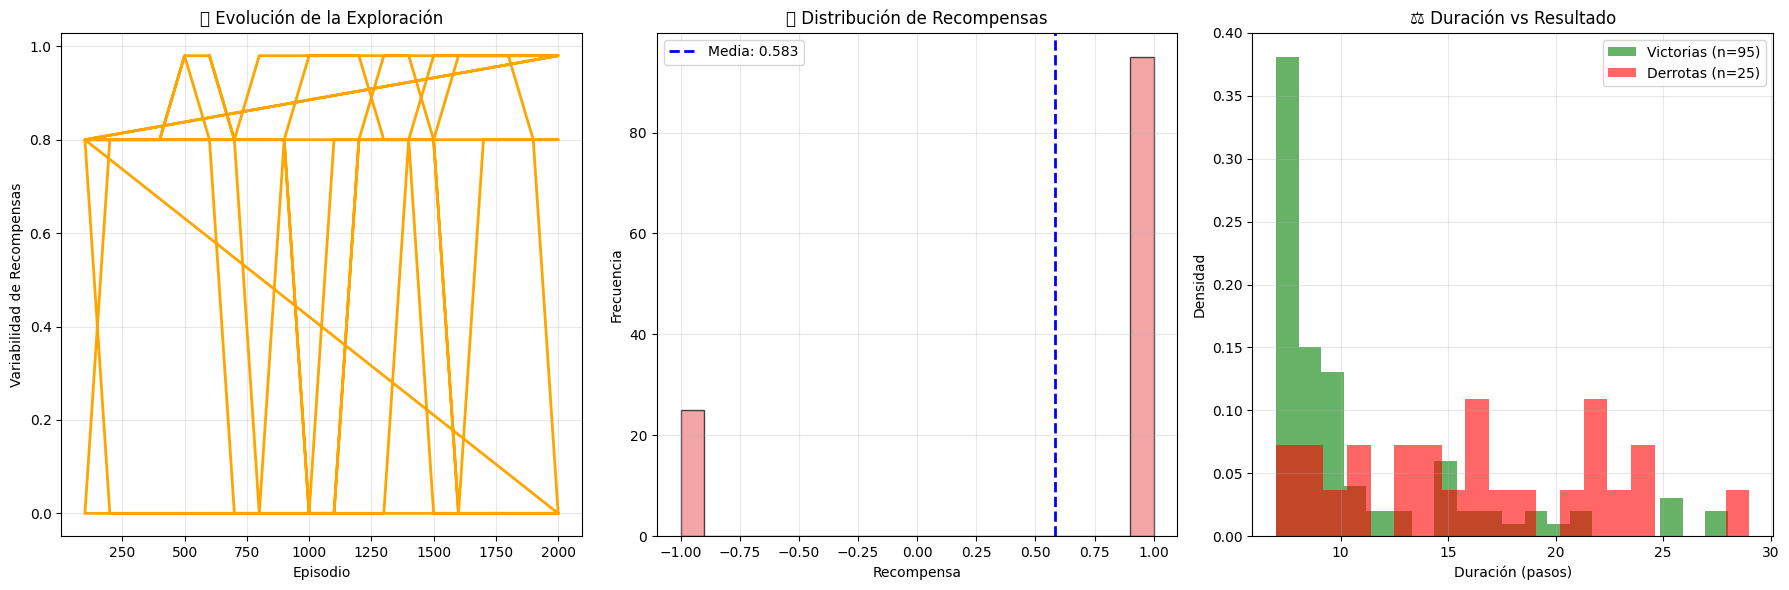


💾 Resumen guardado en memoria:
   episodios_totales: 2000
   tasa_victoria_final: 75.300
   victorias_totales: 1506
   derrotas_totales: 494
   empates_totales: 0
   duracion_promedio: 12.100
   recompensa_promedio: 0.583
   estados_q_table: Información disponible en q_table.pkl

✅ Análisis completado exitosamente!
💡 Tips para mejorar el rendimiento:
   • Entrenar más episodios si la tasa de victoria no se ha estabilizado
   • Ajustar parámetros de aprendizaje (alpha, gamma, epsilon)
   • Entrenar contra oponentes más fuertes (como MCTS)
   • Considerar técnicas de Deep Q-Learning para espacios de estado grandes


In [18]:
# Gráficos adicionales y análisis de tendencias
print("📈 Generando análisis adicionales...")

# Crear más visualizaciones específicas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Evolución de la exploración (aproximada por la varianza de recompensas)
if len(episodes) > 10:
    window = max(5, len(episodes) // 50)
    exploration_proxy = []
    for i in range(window, len(rewards)):
        window_rewards = rewards[i-window:i]
        exploration_proxy.append(np.std(window_rewards))
    
    axes[0].plot(episodes[window:], exploration_proxy, color='orange', linewidth=2)
    axes[0].set_xlabel("Episodio")
    axes[0].set_ylabel("Variabilidad de Recompensas")
    axes[0].set_title("🔍 Evolución de la Exploración")
    axes[0].grid(True, alpha=0.3)

# 2. Distribución de recompensas por bins
axes[1].hist(rewards, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].axvline(np.mean(rewards), color='blue', linestyle='--', linewidth=2, label=f'Media: {np.mean(rewards):.3f}')
axes[1].set_xlabel("Recompensa")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("🎁 Distribución de Recompensas")
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# 3. Correlación entre duración de partida y resultado
win_steps = [steps[i] for i in range(len(steps)) if rewards[i] > 0]
loss_steps = [steps[i] for i in range(len(steps)) if rewards[i] < 0]
draw_steps = [steps[i] for i in range(len(steps)) if rewards[i] == 0]

if win_steps:
    axes[2].hist(win_steps, bins=20, alpha=0.6, color='green', label=f'Victorias (n={len(win_steps)})', density=True)
if loss_steps:
    axes[2].hist(loss_steps, bins=20, alpha=0.6, color='red', label=f'Derrotas (n={len(loss_steps)})', density=True)
if draw_steps:
    axes[2].hist(draw_steps, bins=20, alpha=0.6, color='orange', label=f'Empates (n={len(draw_steps)})', density=True)

axes[2].set_xlabel("Duración (pasos)")
axes[2].set_ylabel("Densidad")
axes[2].set_title("⚖️ Duración vs Resultado")
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

# Guardar un resumen de las métricas principales
summary = {
    "episodios_totales": episodes[-1],
    "tasa_victoria_final": win_rates[-1],
    "victorias_totales": wins[-1],
    "derrotas_totales": losses[-1],
    "empates_totales": draws[-1],
    "duracion_promedio": np.mean(steps),
    "recompensa_promedio": np.mean(rewards),
    "estados_q_table": "Información disponible en q_table.pkl"
}

print("\n💾 Resumen guardado en memoria:")
for key, value in summary.items():
    if isinstance(value, float):
        print(f"   {key}: {value:.3f}")
    else:
        print(f"   {key}: {value}")

print("\n✅ Análisis completado exitosamente!")
print("💡 Tips para mejorar el rendimiento:")
print("   • Entrenar más episodios si la tasa de victoria no se ha estabilizado")
print("   • Ajustar parámetros de aprendizaje (alpha, gamma, epsilon)")
print("   • Entrenar contra oponentes más fuertes (como MCTS)")
print("   • Considerar técnicas de Deep Q-Learning para espacios de estado grandes")